In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

import pandas as pd
import numpy as np

import density_contour

In [2]:
df = pd.read_csv('data/PLDataLOGGED_TH_TR_GS_FR_ElementNum.txt',
                 header=None, sep='  ', names=['x', 'y', 'group'])

/home/administrator/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


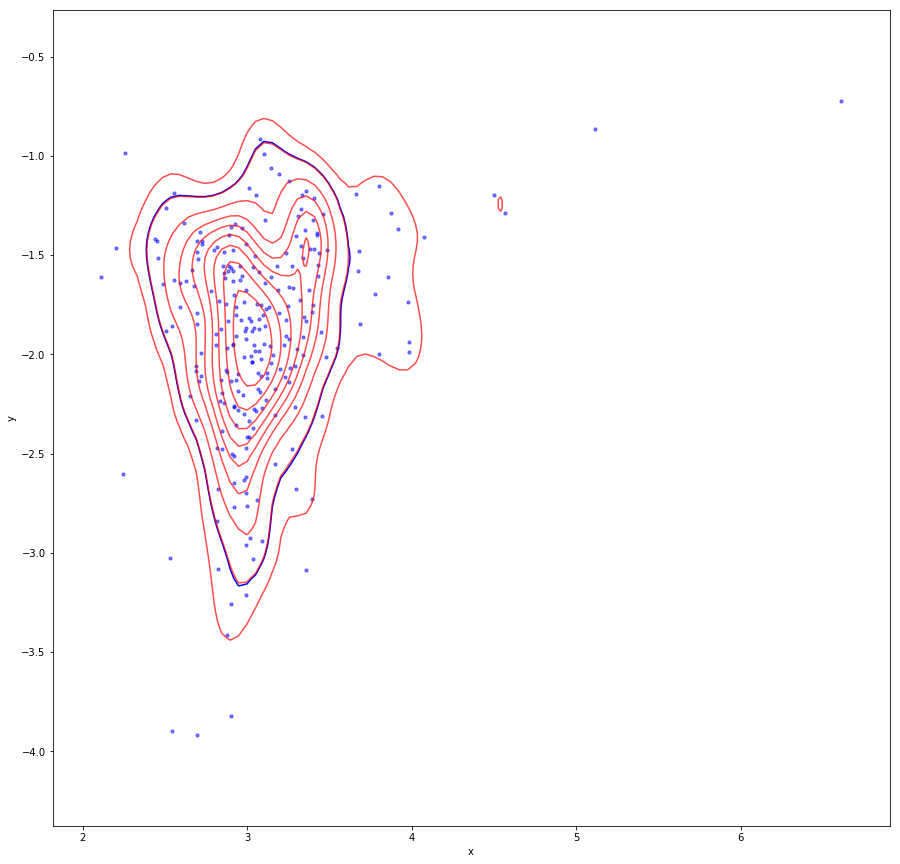

In [4]:
def cmap_from_color(color, min_alpha=0.1, max_alpha=1, n_levels=10):
    color = mpl.colors.colorConverter.to_rgba(color, alpha=max_alpha)
    transparent = mpl.colors.colorConverter.to_rgba(color, alpha=0.0)
    c_list = [color] + [transparent] * (n_levels - 1)
    return mpl.colors.LinearSegmentedColormap.from_list('temp_cmap', c_list, n_levels)

f, ax = plt.subplots(figsize=(15,15))
sns.kdeplot(df.x, df.y, ax=ax, cmap=cmap_from_color('blue')) 
ax.scatter(df.x, df.y, color='blue', s=10, alpha=0.5)
for level in np.linspace(0.1, 0.9, 9):
    density_contour.bivar_kde_contour(df.x, df.y, frac=level, ax=ax, color='red', alpha=0.7)